<a href="https://colab.research.google.com/github/Francisco2963/Examen_de_cintur-n_AML/blob/main/Francisco_Barrios_Examen_de_cintur%C3%B3n_AML_Opci%C3%B3n_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Examen de cinturón AML: Opción A

Descripción del examen:

En este examen, trabajarás con un dataset reciente de complejidad baja, donde primero realizarás un análisis no supervisado utilizando K-means o PCA, y luego modelarás el conjunto de datos utilizando un Perceptrón Multicapa (MLP). El objetivo es aplicar técnicas de clustering o reducción de dimensionalidad para analizar los datos, seguido de la implementación de un modelo MLP para realizar predicciones.

Dataset:

El dataset utilizado para este examen es el «Customer Personality Analysis» disponible en Kaggle. Este conjunto de datos contiene información demográfica y de comportamiento de clientes, con el objetivo de agruparlos y predecir sus patrones de compra.
Enlace al dataset: https://www.kaggle.com/imakash3011/customer-personality-analysis

Instrucciones:

1. Exploración y preprocesamiento de datos:

  – Carga y explora el dataset para identificar las variables más relevantes. Las características incluyen información demográfica como la edad, el ingreso, el estado civil, y datos de comportamiento de compra, como la cantidad gastada en diferentes productos.

  – Asegúrate de manejar los valores nulos y realizar un preprocesamiento adecuado, como la normalización de los datos para el análisis posterior.

2. Análisis no supervisado:

  – Selecciona un enfoque de análisis no supervisado: K-means o PCA.

    – K-means: Si seleccionas K-means, determina el número óptimo de clusters utilizando el método del codo o el silhouette score. Agrupa a los clientes en diferentes clusters y analiza cómo se dividen según sus características demográficas y de compra.

    – PCA: Si eliges PCA, realiza una reducción de dimensionalidad para capturar al menos el 90% de la varianza explicada. Proyecta los datos en los primeros componentes principales y visualiza cómo se agrupan los clientes en el nuevo espacio de características.

3. Modelado con MLP:

  – Implementa un Perceptrón Multicapa (MLP) para predecir las compras futuras de los clientes o su probabilidad de realizar una compra en una categoría específica de productos.

  – Divide el dataset en conjuntos de entrenamiento y prueba, asegurándote de tener una proporción adecuada de cada clase en el conjunto de datos.

  – Discute la arquitectura de tu MLP, incluyendo el número de capas ocultas, el número de neuronas en cada capa, y las funciones de activación utilizadas.

4. Evaluación del modelo:

  – Evalúa el modelo MLP utilizando métricas de clasificación como la precisión, el recall, el F1-score y la matriz de confusión. Asegúrate de comparar estas métricas entre el conjunto de entrenamiento y el conjunto de prueba para identificar cualquier posible sobreajuste.

  – Visualiza las curvas de aprendizaje que muestren la pérdida y la precisión a lo largo del entrenamiento.

5. Discusión y análisis:

  – Reflexiona sobre los resultados del análisis no supervisado y el modelo MLP. ¿Qué insights obtuviste de los clusters o los componentes principales? ¿Cómo se relacionan con el comportamiento de los clientes?

  – Discute el rendimiento del modelo MLP. ¿Es adecuado para este tipo de datos? ¿Cómo podrías mejorarlo?

6. Entrega final:

  – Entrega un informe detallado que incluya todas las etapas del examen: preprocesamiento de datos, análisis no supervisado, modelado MLP, evaluación del modelo y conclusiones. Asegúrate de que el informe sea claro y estructurado, con visualizaciones que apoyen tu análisis.

# EDA

COLUMNAS DEL DATASET

GENTE

D: Identificador único del cliente

Year_Birth: Año de nacimiento del cliente

Educación: Nivel de educación del cliente.

Estado civil: estado civil del cliente

Ingresos: Ingresos familiares anuales del cliente.

Kidhome: Número de niños en el hogar del cliente

Teenhome: Número de adolescentes en el hogar del cliente

Dt_Customer: Fecha de alta del cliente en la empresa

Recencia: Número de días desde la última compra del cliente

Queja: 1 si el cliente se quejó en los últimos 2 años, 0 en caso contrario

Productos

MntWines: Cantidad gastada en vino en los últimos 2 años

MntFruits: Cantidad gastada en frutas en los últimos 2 años

MntMeatProducts: Cantidad gastada en carne en los últimos 2 años

MntFishProducts: Cantidad gastada en pescado en los últimos 2 años

MntSweetProducts: Cantidad gastada en dulces en los últimos 2 años

MntGoldProds: Cantidad gastada en oro en los últimos 2 años

Promoción

NumDealsPurchases: Número de compras realizadas con descuento

AcceptedCmp1: 1 si el cliente aceptó la oferta en la 1.ª campaña, 0 en caso contrario

AcceptedCmp2: 1 si el cliente aceptó la oferta en la 2da campaña, 0 en caso contrario

AcceptedCmp3: 1 si el cliente aceptó la oferta en la 3.ª campaña, 0 en caso contrario

AcceptedCmp4: 1 si el cliente aceptó la oferta en la 4ta campaña, 0 en caso contrario

AcceptedCmp5: 1 si el cliente aceptó la oferta en la quinta campaña, 0 en caso contrario

Respuesta: 1 si el cliente aceptó la oferta en la última campaña, 0 en caso contrario

Lugar

NumWebPurchases: Número de compras realizadas a través del sitio web de la empresa

NumCatalogPurchases: Número de compras realizadas utilizando un catálogo

NumStorePurchases: Número de compras realizadas directamente en tiendas

NumWebVisitsMonth: Número de visitas al sitio web de la empresa en el último mes

Objetivo

Es necesario realizar una agrupación para resumir los segmentos de clientes.

In [359]:
from google.colab import files
import zipfile
import os
import pandas as pd

In [360]:
# Paso 1: Subir el archivo ZIP desde la PC
uploaded = files.upload()

Saving archive (3).zip to archive (3) (7).zip


In [361]:
# Paso 2: Extraer el contenido del archivo ZIP
# Obtener el nombre del archivo subido
zip_filename = list(uploaded.keys())[0]

In [362]:
# Crear una carpeta para extraer los archivos
extract_to = '/content/extracted_files/'
os.makedirs(extract_to, exist_ok=True)

In [363]:
# Extraer el archivo ZIP en la carpeta especificada
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

In [364]:
# Listar los archivos extraídos
print("Archivos extraídos:", os.listdir(extract_to))

Archivos extraídos: ['marketing_campaign.csv']


In [365]:
# Paso 3: Cargar el archivo CSV en un DataFrame

csv_file_path = os.path.join(extract_to, 'marketing_campaign.csv')
df = pd.read_csv(csv_file_path, sep='\t')

In [366]:
# Mostrar las primeras filas del DataFrame para verificar la carga
print("Primeras filas:")
df.head()


Primeras filas:


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [367]:
df.duplicated().sum()

0

In [368]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [369]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [370]:
df['Income'].unique()

array([58138., 46344., 71613., ..., 56981., 69245., 52869.])

In [371]:
df['Income'].sort_values()

,Income
1245,1730.0
21,2447.0
1524,3502.0
1846,4023.0
1975,4428.0
...,...
2078,NaN
2079,NaN
2081,NaN
2084,NaN


In [372]:
filas_con_nan = df.loc[df['Income'].isnull()]
filas_con_nan

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


In [373]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


COMENTARIO DE LOS Nan EN COLUMNA Income

He decidido eliminar los 24 valores NaN de esta columna debido a que no es posible establecer el ingreso de estos clientes, el argumento principal para eliminarlos es que al aanlizar las ultimas columnas del Dataset que tienen relacion con el lugar:
NumWebPurchases: Número de compras realizadas a través del sitio web de la empresa

NumCatalogPurchases: Número de compras realizadas utilizando un catálogo

NumStorePurchases: Número de compras realizadas directamente en tiendas

NumWebVisitsMonth: Número de visitas al sitio web de la empresa en el último mes.

Estos clientes solamente compran de forma precencial en la tienda, por lo tanto no es recomedable usar alguna tecnica de imputacion como la media o la moda para rellenar los NaN de esta columna, en este caso y para lo que solcita el ejercico lo mejor es eliminar estos NaN.

In [374]:
df = df.dropna(subset=['Income'])

In [375]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [376]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   int64 

In [377]:
df = df.reset_index(drop=True)

In [378]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

**VALORES OUTLIERS**

In [379]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [380]:
# Función para identificar outliers usando el método IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers
# Aplicar la función a todas las columnas numéricas
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    outliers = detect_outliers(df, col)
    print(f"Outliers en {col}: {outliers.shape[0]}")
    outliers

Outliers en ID: 0
Outliers en Year_Birth: 3
Outliers en Income: 8
Outliers en Kidhome: 0
Outliers en Teenhome: 0
Outliers en Recency: 0
Outliers en MntWines: 35
Outliers en MntFruits: 246
Outliers en MntMeatProducts: 174
Outliers en MntFishProducts: 222
Outliers en MntSweetProducts: 246
Outliers en MntGoldProds: 205
Outliers en NumDealsPurchases: 84
Outliers en NumWebPurchases: 3
Outliers en NumCatalogPurchases: 23
Outliers en NumStorePurchases: 0
Outliers en NumWebVisitsMonth: 8
Outliers en AcceptedCmp3: 163
Outliers en AcceptedCmp4: 164
Outliers en AcceptedCmp5: 162
Outliers en AcceptedCmp1: 142
Outliers en AcceptedCmp2: 30
Outliers en Complain: 21
Outliers en Z_CostContact: 0
Outliers en Z_Revenue: 0
Outliers en Response: 333


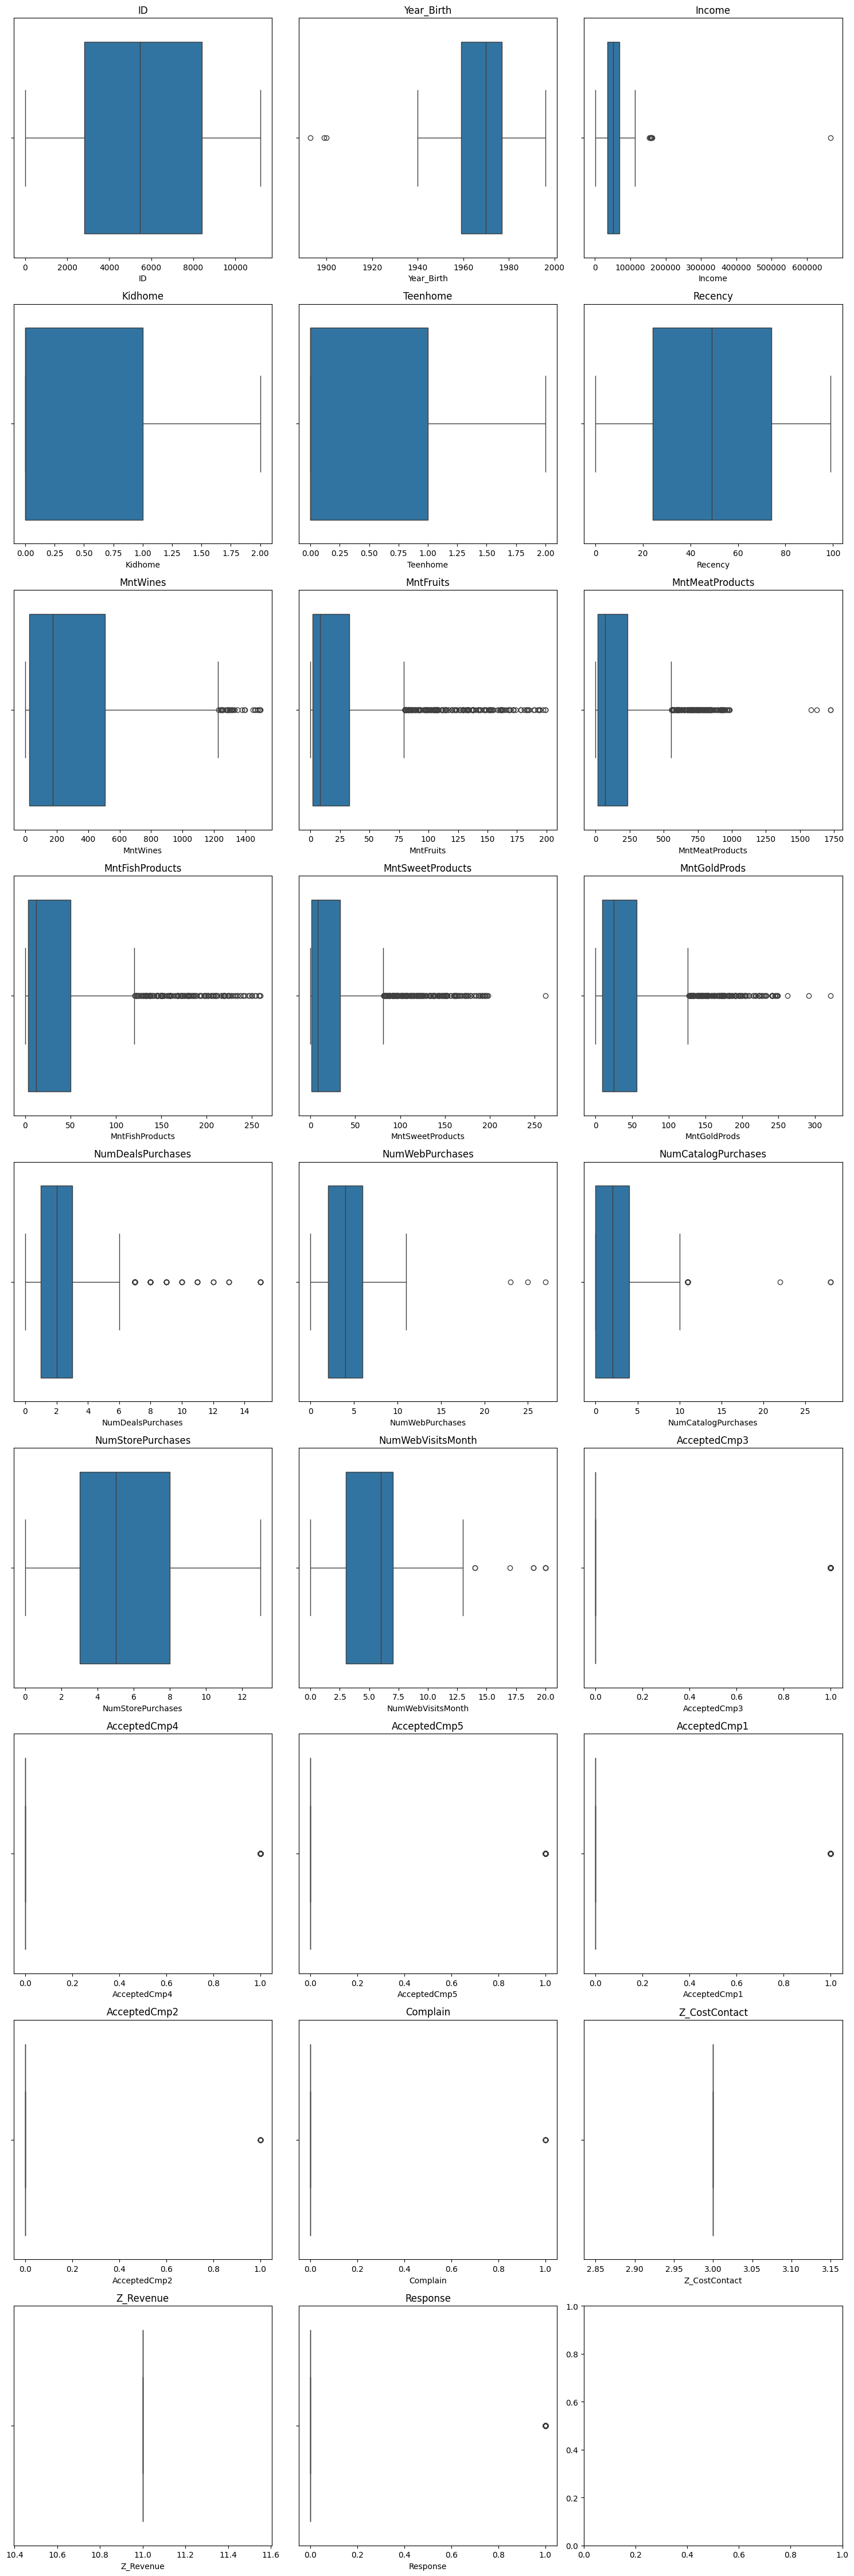

In [381]:
# Obtener las columnas numéricas
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns


num_cols = len(numeric_cols)
num_rows = (num_cols + 2) // 3

# Crear una figura con el número correcto de filas y columnas
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Aplanar el array de axes para facilitar el acceso

# Iterar sobre las columnas numéricas y crear los boxplots
for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)

# Ajustar el layout para eliminar los subplots vacíos
plt.tight_layout()

plt.show()

COMENTARIO

Los graficos muestran varios outliers, como como por ejmplo en Year_Birth donde claramente los valores outliers no corresponde, seran eliminados.

Los otros valores outliers podrian mostrar tendencias de compras de los clientes en fechas especiales, como ejemplo, navidad, o alguna festevidad, o un evento deportivo respectivo que hagan que se disparen las ventas. Como por ejmplo los dulces que podrian estar relacionados a la fiesta de Hallowen o los pescados que podrian estar muy relacionada con la semana santa donde el pescado y los mariscos tienen una alta demanda en esa fecha.

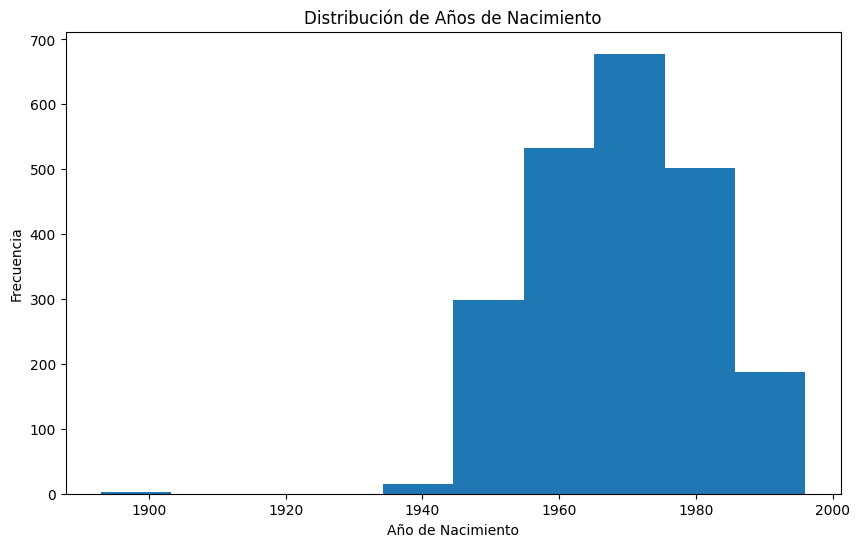

In [382]:
# Visualizar la distribución antes de eliminar los outliers
plt.figure(figsize=(10, 6))
plt.hist(df['Year_Birth'])
plt.xlabel('Año de Nacimiento')
plt.ylabel('Frecuencia')
plt.title('Distribución de Años de Nacimiento')
plt.show()

El Histograma muestra claramente los valores outliers, alrededor del 1900, claramente este valor no es posible ya que el cliente tendria mas de 100 años. Por lo tanto eliminaremos esos valores outliers

In [383]:
df['Year_Birth'].sort_values()

,Year_Birth
228,1893
326,1899
181,1900
1933,1940
411,1941
...,...
1833,1995
683,1995
2190,1995
43,1996


In [384]:
# Definir un rango de años de nacimiento plausibles (ajusta según tu dataset)
min_year = 1930
max_year = 2000

# Eliminar filas donde YearBirth esté fuera del rango
df = df[(df['Year_Birth'] >= min_year) & (df['Year_Birth'] <= max_year)]

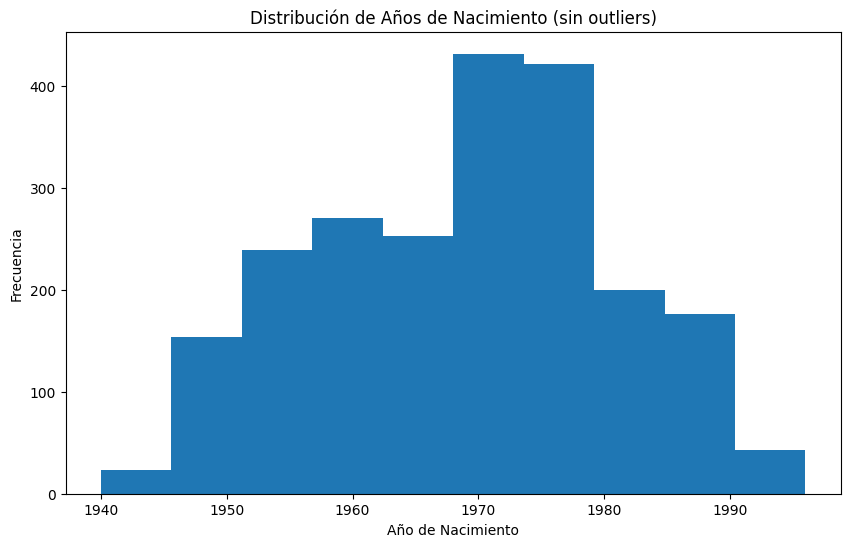

In [385]:
plt.figure(figsize=(10, 6))
plt.hist(df['Year_Birth'])
plt.xlabel('Año de Nacimiento')
plt.ylabel('Frecuencia')
plt.title('Distribución de Años de Nacimiento (sin outliers)')
plt.show()

Confirmacion de la eliminacion de los vaoores outliers con fechas menores o iguales a 1900.

COMENTARIO ELIMINACION OUTLIER

He decidido no eliminar los valores outlier, el motivo de esta decision es que al eliminar todos los outliers podriamos perder demaciada informacion relevante para nuestro analisis.

 Realice una prueba eliminando algunos outliers de algunas columnas y esta decision eliminaba casi el 50% de los datos, por lo tanto dejaremos los valores , solamente se eliminaron los outliers que corresponden a la columna Year_Birth

In [386]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2213.0,5586.899232,3247.819194,0.0,2815.0,5455.0,8420.0,11191.0
Year_Birth,2213.0,1968.917307,11.700216,1940.0,1959.0,1970.0,1977.0,1996.0
Income,2213.0,52236.581563,25178.603047,1730.0,35246.0,51373.0,68487.0,666666.0
Kidhome,2213.0,0.441934,0.536965,0.0,0.0,0.0,1.0,2.0
Teenhome,2213.0,0.505648,0.544236,0.0,0.0,0.0,1.0,2.0
Recency,2213.0,49.007682,28.941864,0.0,24.0,49.0,74.0,99.0
MntWines,2213.0,305.153638,337.305490,0.0,24.0,175.0,505.0,1493.0
MntFruits,2213.0,26.323995,39.735932,0.0,2.0,8.0,33.0,199.0
MntMeatProducts,2213.0,166.962494,224.226178,0.0,16.0,68.0,232.0,1725.0
MntFishProducts,2213.0,37.635337,54.763278,0.0,3.0,12.0,50.0,259.0


In [387]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2213 entries, 0 to 2215
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2213 non-null   int64  
 1   Year_Birth           2213 non-null   int64  
 2   Education            2213 non-null   object 
 3   Marital_Status       2213 non-null   object 
 4   Income               2213 non-null   float64
 5   Kidhome              2213 non-null   int64  
 6   Teenhome             2213 non-null   int64  
 7   Dt_Customer          2213 non-null   object 
 8   Recency              2213 non-null   int64  
 9   MntWines             2213 non-null   int64  
 10  MntFruits            2213 non-null   int64  
 11  MntMeatProducts      2213 non-null   int64  
 12  MntFishProducts      2213 non-null   int64  
 13  MntSweetProducts     2213 non-null   int64  
 14  MntGoldProds         2213 non-null   int64  
 15  NumDealsPurchases    2213 non-null   int64 

In [388]:
df = df.reset_index(drop=True)

In [389]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2213 entries, 0 to 2212
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2213 non-null   int64  
 1   Year_Birth           2213 non-null   int64  
 2   Education            2213 non-null   object 
 3   Marital_Status       2213 non-null   object 
 4   Income               2213 non-null   float64
 5   Kidhome              2213 non-null   int64  
 6   Teenhome             2213 non-null   int64  
 7   Dt_Customer          2213 non-null   object 
 8   Recency              2213 non-null   int64  
 9   MntWines             2213 non-null   int64  
 10  MntFruits            2213 non-null   int64  
 11  MntMeatProducts      2213 non-null   int64  
 12  MntFishProducts      2213 non-null   int64  
 13  MntSweetProducts     2213 non-null   int64  
 14  MntGoldProds         2213 non-null   int64  
 15  NumDealsPurchases    2213 non-null   i

**VISUALIZACIONES**

Crearemos dos nuevas columnas llamadas gasto total y Tipo de cliente, con estas nuevas columnas podemos agrupar y categorizar los tipos de clientes que tiene la tienda.

In [390]:
# Convertir la columna 'Dt_Customer' a tipo datetime para poder hacer comparaciones
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

# Definir una fecha de referencia para clasificar clientes antiguos y nuevos
# Por ejemplo, podemos usar la mediana de las fechas de registro como referencia
median_date = df['Dt_Customer'].median()

# Calcular el ingreso promedio
avg_income = df['Income'].mean()

# Crear una nueva columna que contenga el gasto total por cliente
df['Gasto_Total'] = df[['MntWines', 'MntFruits', 'MntMeatProducts',
                        'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Calcular el gasto promedio
avg_spend = df['Gasto_Total'].mean()

# Crear la columna para clasificar a los clientes
def classify_customer(row):
    # Verificar si es cliente antiguo o nuevo
    is_old_customer = row['Dt_Customer'] <= median_date

    # Verificar si el ingreso es alto o bajo
    is_high_income = row['Income'] >= avg_income

    # Verificar si el gasto es alto o bajo
    is_high_spender = row['Gasto_Total'] >= avg_spend

    # Clasificar en las categorías dadas
    if is_old_customer and is_high_income and is_high_spender:
        return 'VIP'
    elif not is_old_customer and not is_high_income and not is_high_spender:
        return 'Bajo Potencial'
    elif not is_old_customer and is_high_income and is_high_spender:
        return 'Alto Potencial'
    elif is_old_customer and not is_high_income and not is_high_spender:
        return 'En fuga'
    else:
        return 'Otros'  # Si no cae en ninguna categoría exacta

# Aplicar la función a cada fila del DataFrame
df['Tipo_Cliente'] = df.apply(classify_customer, axis=1)

# Ver los primeros registros para verificar
df[['ID', 'Income', 'Gasto_Total', 'Dt_Customer', 'Tipo_Cliente']].head()

,ID,Income,Gasto_Total,Dt_Customer,Tipo_Cliente
0,5524,58138.0,1617,2012-09-04,VIP
1,2174,46344.0,27,2014-03-08,Bajo Potencial
2,4141,71613.0,776,2013-08-21,Alto Potencial
3,6182,26646.0,53,2014-02-10,Bajo Potencial
4,5324,58293.0,422,2014-01-19,Otros


<ipython-input-392-14f7fceb849e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='viridis')


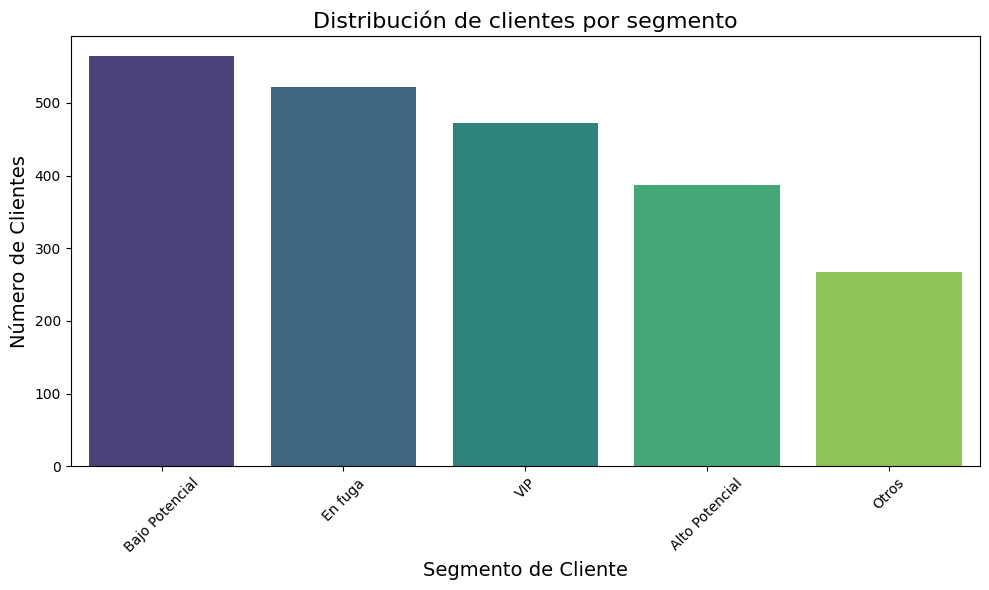

In [392]:
# Contar cuántos clientes hay en cada segmento
segment_counts = df['Tipo_Cliente'].value_counts()

# Definir el tamaño de la figura
plt.figure(figsize=(10, 6))
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='viridis')
plt.title('Distribución de clientes por segmento', fontsize=16)
plt.xlabel('Segmento de Cliente', fontsize=14)
plt.ylabel('Número de Clientes', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

COMENTARIO

El grafico muestra que los clientes de bajo potencia y en fuga tienen un alto porcentaje, lo que es preocupante, considerando que hay un buen porcentaje de clientes VIP y de Alto Potencial, lo que indica queste grafico es que se debe poner especial atencion a los clientes en fuga y bajo potencial para que se transformen en clientes VIP o de alto potencial. Para ello se puede implementa estrategias de marketing o de descuentos para este grupo de clientes y asi evitar una fuga masiva de clientes, que entre ambos grupos podria legar casi al 50% de los clientes de esta tienda.

In [393]:
# Agrupar los datos por tipo de cliente y calcular la suma del gasto total
gastos_por_tipo = df.groupby('Tipo_Cliente')['Gasto_Total'].sum()

# Ordenar los datos por gasto total de mayor a menor
gastos_por_tipo = gastos_por_tipo.sort_values(ascending=False)



<ipython-input-394-8843539e3672>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gasto_Total', y='Tipo_Cliente', data=gastos_por_tipo.reset_index(), palette="viridis")


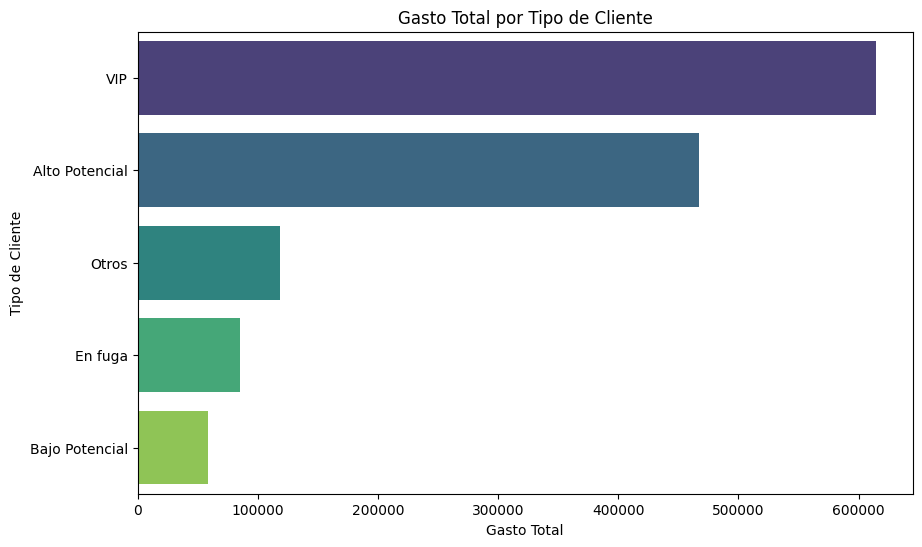

In [394]:
# Crear el gráfico con la paleta de colores Viridis
plt.figure(figsize=(10, 6))
sns.barplot(x='Gasto_Total', y='Tipo_Cliente', data=gastos_por_tipo.reset_index(), palette="viridis")
plt.xlabel('Gasto Total')
plt.ylabel('Tipo de Cliente')
plt.title('Gasto Total por Tipo de Cliente')

plt.show()

COMENTARIO

El grafico de gastos por segmento corrobora lo indicado en el grafico anterior, ya que los clientes en fuga y de bajo potencial, gastan muy poco dinero en comparacion con los clientes VIP y de Alto potencial.

Se puede usar estrategias de marketing y de promociones para este tipo de clientes (en fuga y bajo potencial) para asi robustecer las ventas de la empresa, ya que, como se dijo anteriormente, estos segmentos de clientes representan casi el 50% del total de clientes de la empresa.

Con buenas estrategias de marketing y promociones diseñadas especialemnte para este grupo de clientes se podria llegar a sumar a un grupo de clientes a las  categorias de clientes VIP o de  alto poyencial.

In [395]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2213 entries, 0 to 2212
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2213 non-null   int64         
 1   Year_Birth           2213 non-null   int64         
 2   Education            2213 non-null   object        
 3   Marital_Status       2213 non-null   object        
 4   Income               2213 non-null   float64       
 5   Kidhome              2213 non-null   int64         
 6   Teenhome             2213 non-null   int64         
 7   Dt_Customer          2213 non-null   datetime64[ns]
 8   Recency              2213 non-null   int64         
 9   MntWines             2213 non-null   int64         
 10  MntFruits            2213 non-null   int64         
 11  MntMeatProducts      2213 non-null   int64         
 12  MntFishProducts      2213 non-null   int64         
 13  MntSweetProducts     2213 non-nul

In [396]:
correlation_matrix = df[['Income','Dt_Customer','Recency','MntWines','MntFruits','MntMeatProducts',
                         'MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases',
                         'NumWebPurchases','NumCatalogPurchases','NumStorePurchases',
                         'NumWebVisitsMonth','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5',
                         'AcceptedCmp1','AcceptedCmp2','Response','Gasto_Total']].corr(method='pearson')

print('\nCorrelación de Pearson: ')
print(correlation_matrix)


Correlación de Pearson: 
                       Income  Dt_Customer   Recency  MntWines  MntFruits  \
Income               1.000000     0.018224 -0.003111  0.578481   0.430248   
Dt_Customer          0.018224     1.000000 -0.025600 -0.167746  -0.068109   
Recency             -0.003111    -0.025600  1.000000  0.016332  -0.005129   
MntWines             0.578481    -0.167746  0.016332  1.000000   0.385892   
MntFruits            0.430248    -0.068109 -0.005129  0.385892   1.000000   
MntMeatProducts      0.584361    -0.089396  0.023177  0.568189   0.546767   
MntFishProducts      0.438523    -0.081647  0.001007  0.397035   0.593062   
MntSweetProducts     0.440532    -0.080665  0.025495  0.389731   0.571498   
MntGoldProds         0.325073    -0.161047  0.018394  0.391604   0.393503   
NumDealsPurchases   -0.082874    -0.217983  0.002236  0.008769  -0.134287   
NumWebPurchases      0.388183    -0.192040 -0.005518  0.553704   0.302340   
NumCatalogPurchases  0.589090    -0.097188  0.0244

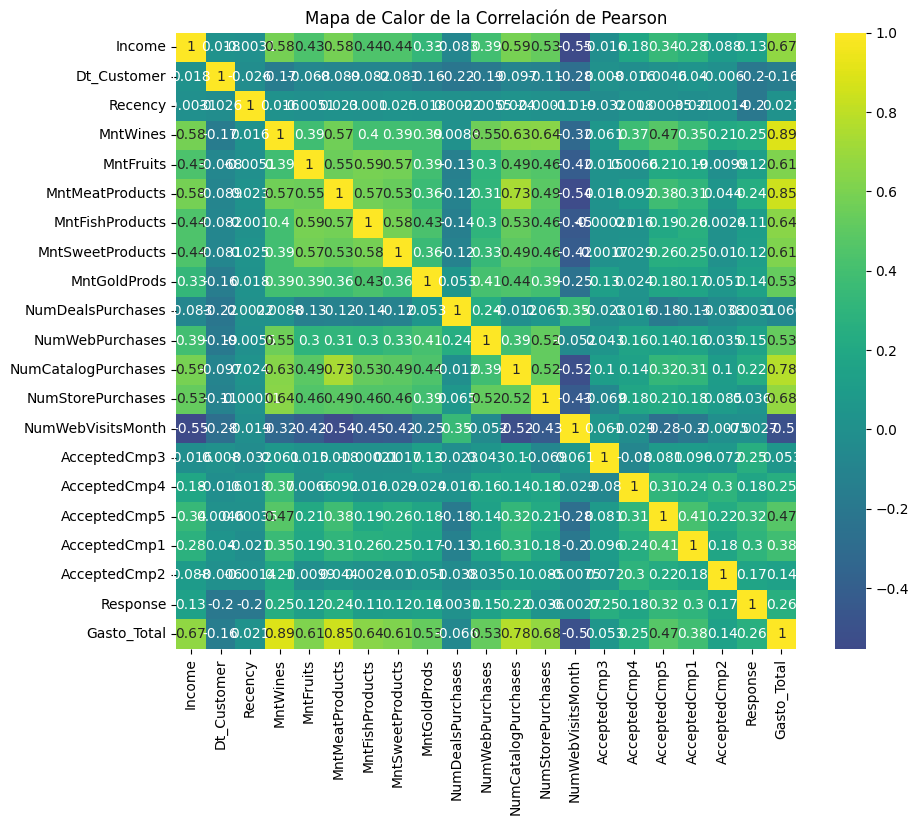

In [299]:
# Crear mapas de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', center=0)
plt.title("Mapa de Calor de la Correlación de Pearson")
plt.show()

COMENTARIO

Correlaciones positivas fuertes:

Gasto total y otras variables: sE Observa que el "Gasto total" tiene una correlación positiva fuerte con muchas otras variables, como "Income" (ingresos), "MntWines" (cantidad gastada en vinos), etc. Esto indica que los clientes que gastan más dinero en general también tienden a gastar más en categorías específicas.

Variables de compra: Las variables relacionadas con la cantidad de compras (por ejemplo, "NumDealsPurchases", "NumWebPurchases") también tienden a estar correlacionadas positivamente entre sí. Esto es lógico, ya que los clientes que realizan más compras en general también tienden a realizar más compras en canales específicos.

Correlaciones negativas:

Algunas correlaciones negativas pueden indicar relaciones inversas: Por ejemplo, si una variable tiene una correlación negativa con el "Gasto total", podría significar que a medida que aumenta esa variable, el gasto total tiende a disminuir.

# PREPROCESAMIENTO

In [397]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2213 entries, 0 to 2212
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2213 non-null   int64         
 1   Year_Birth           2213 non-null   int64         
 2   Education            2213 non-null   object        
 3   Marital_Status       2213 non-null   object        
 4   Income               2213 non-null   float64       
 5   Kidhome              2213 non-null   int64         
 6   Teenhome             2213 non-null   int64         
 7   Dt_Customer          2213 non-null   datetime64[ns]
 8   Recency              2213 non-null   int64         
 9   MntWines             2213 non-null   int64         
 10  MntFruits            2213 non-null   int64         
 11  MntMeatProducts      2213 non-null   int64         
 12  MntFishProducts      2213 non-null   int64         
 13  MntSweetProducts     2213 non-nul

In [398]:
df.drop(columns=['ID', 'Dt_Customer'], inplace=True)

In [399]:
df = pd.get_dummies(df, columns=['Education', 'Marital_Status', 'Tipo_Cliente'], drop_first=True)

In [400]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2213 entries, 0 to 2212
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year_Birth                   2213 non-null   int64  
 1   Income                       2213 non-null   float64
 2   Kidhome                      2213 non-null   int64  
 3   Teenhome                     2213 non-null   int64  
 4   Recency                      2213 non-null   int64  
 5   MntWines                     2213 non-null   int64  
 6   MntFruits                    2213 non-null   int64  
 7   MntMeatProducts              2213 non-null   int64  
 8   MntFishProducts              2213 non-null   int64  
 9   MntSweetProducts             2213 non-null   int64  
 10  MntGoldProds                 2213 non-null   int64  
 11  NumDealsPurchases            2213 non-null   int64  
 12  NumWebPurchases              2213 non-null   int64  
 13  NumCatalogPurchase

# MODELOS

In [401]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [402]:
# Seleccionar las columnas numéricas
numeric_cols = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
                'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
                'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                'NumWebVisitsMonth', 'Gasto_Total']

# Escalar las columnas numéricas
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

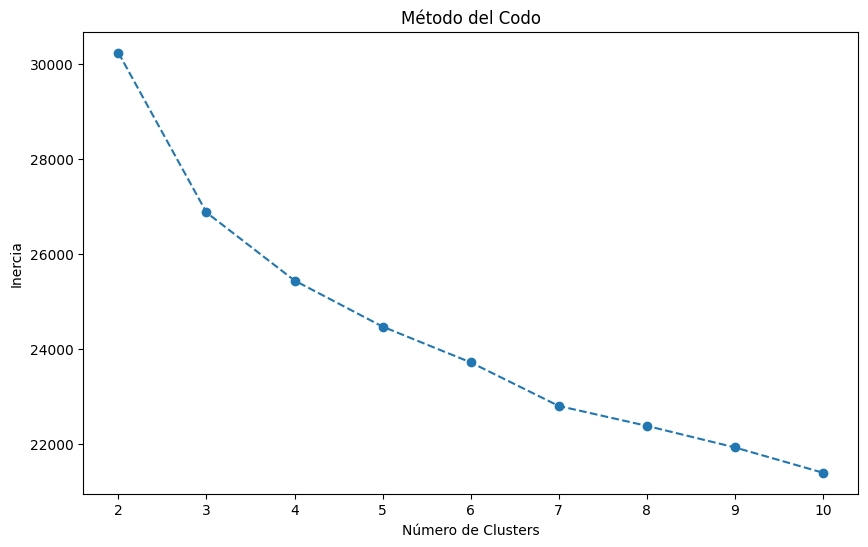

In [403]:
# Método del codo para determinar el número óptimo de clusters
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

# Gráfico del método del codo
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), inertia, marker='o', linestyle='--')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.show()

  COMENTARIO

  Este grafico muestra la relación entre el número de clusters (eje x) y la inercia o costo (eje y).

  En este caso, parece que el codo podría estar alrededor de 4, 5 o 6 clusters, sugiriendo que un número de clusters en este rango podría ser óptimo para la segmentación de los datos.

  Para este ejercico voy a elegir 5 clusters

In [404]:
# Entrenar K-means con el número óptimo de clusters (ajustar 'n_clusters' según el codo)
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(df)

In [405]:
df.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Tipo_Cliente_Bajo Potencial,Tipo_Cliente_En fuga,Tipo_Cliente_Otros,Tipo_Cliente_VIP,cluster
0,-1.018785,0.234435,-0.823208,-0.929307,0.310773,0.978107,1.552498,1.690807,2.454109,1.484200,...,False,True,False,False,False,False,False,False,True,0
1,-1.275248,-0.234084,1.039532,0.908545,-0.380424,-0.872266,-0.637451,-0.718020,-0.650863,-0.633818,...,False,True,False,False,False,True,False,False,False,1
2,-0.334882,0.769733,-0.823208,-0.929307,-0.795142,0.358351,0.570796,-0.178264,1.339972,-0.146917,...,False,False,True,False,False,False,False,False,False,2
3,1.289387,-1.016592,1.039532,-0.929307,-0.795142,-0.872266,-0.561936,-0.655569,-0.504747,-0.585128,...,False,False,True,False,False,True,False,False,False,4
4,1.032923,0.240593,1.039532,-0.929307,1.554927,-0.391881,0.419766,-0.218411,0.152777,-0.000847,...,True,False,False,False,False,False,False,True,False,3


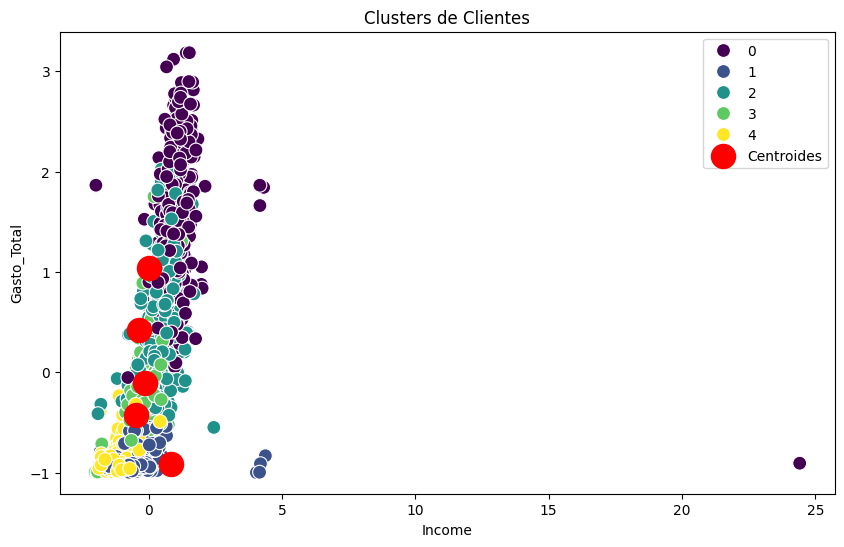

In [406]:
# Visualización de los clusters usando un gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Income', y='Gasto_Total', hue='cluster', palette='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroides')
plt.title('Clusters de Clientes')
plt.xlabel('Income')
plt.ylabel('Gasto_Total')
plt.legend()
plt.show()

COMENTARIO

Este grafico muestra los diferentes clusters de clientes en un espacio de características (ingresos vs. gastos totales).

Los puntos están agrupados en 5 clusters diferentes, representados por diferentes colores. Cada color corresponde a un grupo de clientes con características similares en términos de ingreso y gasto.

Cluster 0: Este cluster agrupa a clientes con ingresos bajos y gastos relativamente bajos. Podría estar relacionado con nuestro tipo de cliente 'En Fuga'.

Cluster 1: Este cluster agrupa a clientes con ingresos moderados y gastos moderados. Podría estar relacionado con nuestro tipo de cliente "Bajp Potencial".

Cluster 2: Este cluster agrupa a clientes con ingresos moderados y gastos altos. Podría estar relacionado con nuestro tipo de cliente "Otros".

Cluster 3: Este cluster agrupa a clientes con ingresos altos y gastos altos. Estos podrían estar relacionados con el tipo de cliente "VIP".

Cluster 4: Este cluster agrupa a clientes con ingresos muy altos y gastos relativamente bajos. Podrían estar relacionados con el tipo de cliente Alto Potencial".

# Implementación del modelo MLP (Perceptrón Multicapa)

In [407]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.utils import resample

In [408]:
# Vericamos la distribicion para asegurarnmos que es binaria
df['cluster'].value_counts()

,count
cluster,
4,531
1,499
0,494
2,483
3,206


In [409]:
# Definir X (características) y y (variable objetivo)
X = df.drop(columns=['cluster'])  # 'cluster' sera la columna objetivo
y = df['cluster']  # Aquí usamos los clusters como etiquetas

In [410]:
# Convertir las etiquetas de clusters a One-Hot Encoding
encoder = OneHotEncoder(sparse_output=False)
y_ohe = encoder.fit_transform(y.values.reshape(-1, 1))  # Asegúrate de que 'y' tiene la forma adecuada


In [411]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_ohe, test_size=0.3, random_state=42)

In [412]:
# Verificar la forma de y_train
print("Forma de y_train:", y_train.shape)  # Debería ser (n_samples, 5)

Forma de y_train: (1549, 5)


In [413]:
# Normalizar las variables numéricas (StandardScaler)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Implementacion de MLP con Dropout

In [414]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [415]:
# Crear una red MLP con dos capas ocultas

model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.2),
    Dense(32,activation='relu'),
    Dropout(0.2),
    Dense(5, activation='softmax') # capa de salida, 5 neurona para salida multiclase
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [416]:
# Compilación del modelo (con `categorical_crossentropy` para multiclase)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [417]:
# Implementar early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [418]:
# visualziar el modelo
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 64)                  │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,933 (19.27 KB)

 Trainable params: 4,933 (19.27 KB)

 Non-trainable params: 0 (0.00 B)

# Entrenamiento del Modelo

In [419]:
# Entrenar el modelo con early stopping

history = model.fit(
    X_train, y_train,
    validation_split=0.2, # % de entrenamiento para la validacion
    epochs=100,  # Epocas maximas
    batch_size=32, #Tamaño del lote
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.3081 - loss: 1.5766 - val_accuracy: 0.6871 - val_loss: 0.9876
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6616 - loss: 0.9787 - val_accuracy: 0.8452 - val_loss: 0.6523
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7567 - loss: 0.6951 - val_accuracy: 0.8774 - val_loss: 0.4540
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8486 - loss: 0.4983 - val_accuracy: 0.9032 - val_loss: 0.3428
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8516 - loss: 0.4299 - val_accuracy: 0.9194 - val_loss: 0.2796
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8762 - loss: 0.3540 - val_accuracy: 0.9226 - val_loss: 0.2468
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9046 - loss: 0.2803 - val_accuracy: 0.9194 - val_loss: 0.2283
Epoch 8/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8908 - loss: 0.2703 - val_accuracy: 0.9258 - v

In [346]:
import matplotlib.pyplot as plt

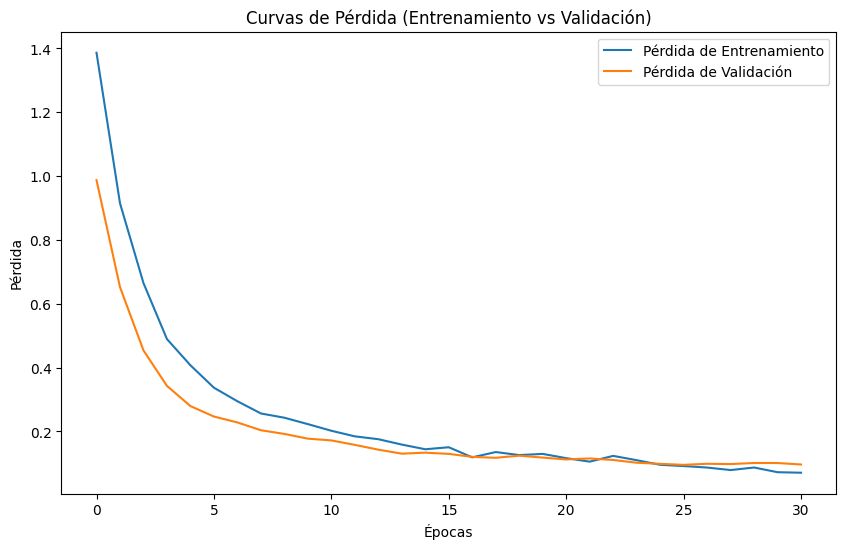

In [420]:
# Pérdida de entrenamiento y validación
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Curvas de Pérdida (Entrenamiento vs Validación)')
plt.legend()
plt.show()

COMENTARIO DEL GRAFICO

Ambas curvas de perdidas disminuyen y se mantienen relativamente cercanas, lo que indica que el modelo ha aprendido las relaciones de los datos sin sobreajustarse, esto podria deberse al haber aplicado early_stopping al modelo que se detuvo en la epoca 29 de entrenamiento y es en este punto donde las curvas se estabilizan lo que sugiere que continuar entrenando el modelo no mejorara significativamente los resultados.

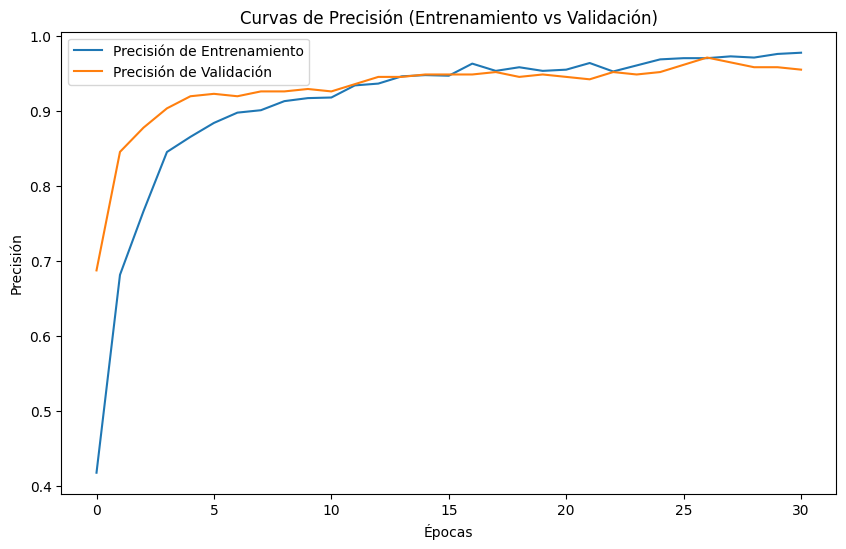

In [421]:
# Precisión de entrenamiento y validación
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.title('Curvas de Precisión (Entrenamiento vs Validación)')
plt.legend()
plt.show()

COMENTARIO DEL GRAFICO

Ambas curvas aumentan y se estabilizan: Tanto la precisión de entrenamiento como la de validación aumentan rápidamente al principio y luego se estabilizan en un valor alto por sobre el 90%. Esto indica que el modelo está aprendiendo las características relevantes de los datos y generalizando bien a nuevos datos.

La brecha entre las curvas es pequeña: La diferencia entre la precisión de entrenamiento y la de validación es relativamente pequeña, lo que sugiere que el modelo no está sobreajustando significativamente. El sobreajuste ocurre cuando el modelo se ajusta demasiado a los datos de entrenamiento y pierde la capacidad de generalizar a nuevos datos

# Evaluacion del Modelo

In [422]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [423]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Precisión en el conjunto de prueba: {test_accuracy:.4f}')

Precisión en el conjunto de prueba: 0.9518


In [424]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Precisión en el conjunto de prueba: {test_accuracy:.4f}')

Precisión en el conjunto de prueba: 0.9518


In [425]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [426]:
# Obtener la clase con la mayor probabilidad
y_pred_classes = np.argmax(y_pred, axis=1)

In [427]:
# Obtener la clase verdadera (en formato original)
y_test_classes = np.argmax(y_test, axis=1)

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       159
           1       0.93      1.00      0.96       151
           2       0.90      0.96      0.93       130
           3       0.98      0.86      0.91        69
           4       0.99      0.96      0.98       155

    accuracy                           0.95       664
   macro avg       0.96      0.94      0.95       664
weighted avg       0.95      0.95      0.95       664

Matriz de confusión:
 [[148   0  10   1   0]
 [  0 151   0   0   0]
 [  4   1 125   0   0]
 [  0   5   4  59   1]
 [  0   6   0   0 149]]


<Figure size 1000x600 with 0 Axes>

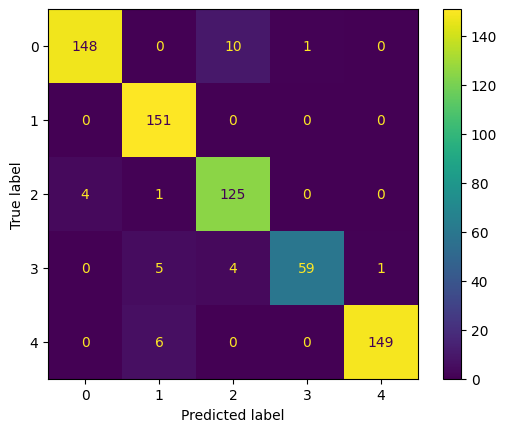

In [428]:
# Imprimir el reporte de clasificación
print(classification_report(y_test_classes, y_pred_classes))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
print("Matriz de confusión:\n", conf_matrix)

# Mostrar la matriz de confusión
plt.figure(figsize=(10, 6))
ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot()
plt.show()

COMENTARIO

Los valores de precisión, recall y F1-score son bastante altos para todas las clases, lo que indica que el modelo está realizando una excelente clasificación. La precisión promedio ponderada es de 0.95, lo que significa que, en general, el modelo está clasificando correctamente el 95% de los ejemplos.

MATRIZ DE CONFUSION

Clases bien clasificadas: Las clases 0, 1, 2 y 4 tienen una alta precisión y recall, lo que indica que el modelo está clasificando correctamente la mayoría de los ejemplos de estas clases.

Clase 3: La clase 3 tiene un recall ligeramente más bajo que las otras clases. Esto podría indicar que el modelo tiene dificultades para clasificar correctamente algunos ejemplos de esta clase

# COMENTARIO FINAL

¿Cuál modelo es más adecuado para el análisis de comportamiento de compras,segun el objetivo de agrupar y predecir sus patrones de compras?

Segmentación de clientes: Si el objetivo es identificar grupos de clientes con comportamientos de compra similares, K-means es una excelente opción. Ya que el grafico de dispercion de las varibles Income y Gasto Total nos muestra claramente los grupos de clientes y sus gastos asociados por lo tanmto puede ayudar a descubrir segmentos de clientes que podrían no ser evidentes a simple vista.

Predicción de comportamiento: Si el objetivo es predecir futuras compras o comportamientos de los clientes (por ejemplo, si un cliente comprará un producto específico), un modelo MLP sería más adecuado.

Interpretabilidad: K-means fue mucho más fácil de interpretar, ya que los clusters pueden visualizarse y analizar. En el caso de MLP, para mi fue mucho mas dificil de interpretar.

En mi caso, para este ejercicio K_means fue mucho mas efectivo en lo que se refiere a la interpretacion de los datos, especidficamente el grafico de dispercion donde se dividieron los clientes en 5 tipos de cluster.  Sin embargo el modelo MLP tuvo una precision icreible y podria ser una mejor alternativa si se quiere predecir comportamientos futuros de los clientes.